# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Arda Deniz Ayyıldız
# Student ID: 2210765018

In [6]:
# imports
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**your design here**\>

Example Table:
| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| table1_id     | PK, int                          |
| table2_id     | FK REFERENCING tabl2, int                          |
| ...     | ...                         |



In [7]:
# your code here
conn = sqlite3.connect("skyward_travelA.db")
cursor = conn.cursor()

#Customers Table
cursor.execute(''' CREATE TABLE IF NOT EXISTS Customers(CustomerID INTEGER PRIMARY KEY, CustomerName TEXT, CustomerEmail TEXT, CustomerPhone TEXT)''')

#Airlines Table
cursor.execute('''CREATE TABLE IF NOT EXISTS Airlines (AirlineID INTEGER PRIMARY KEY, AirlineName TEXT)''')

#Flights Table
cursor.execute('''CREATE TABLE IF NOT EXISTS Flights(FlightID INTEGER PRIMARY KEY, AirlineID INTEGER, Flight_Departure TEXT, Flight_Destination TEXT, Flight_Date DATE, FOREIGN KEY (AirlineID) REFERENCES Airlines(AirlineID) )''')

#Hotels Table
cursor.execute('''CREATE TABLE IF NOT EXISTS Hotels (HotelID INTEGER PRIMARY KEY, HotelName TEXT, HotelLocation TEXT, HotelRating FLOAT )''')

#Bookings Table
cursor.execute('''CREATE TABLE IF NOT EXISTS Bookings(BookingID INTEGER PRIMARY KEY, CustomerID INTEGER, FOREIGN KEY ( CustomerID) REFERENCES Customers(CustomerID))''')

#Flightbookings Table
cursor.execute('''CREATE TABLE IF NOT EXISTS FlightBookings(BookingID INTEGER PRIMARY KEY, FlightID INTEGER, FOREIGN KEY (BookingID) REFERENCES Bookings(BookingID), FOREIGN KEY (FlightID) REFERENCES Flights(FlightID)) ''')

#Hotelbookings Table
cursor.execute('''CREATE TABLE IF NOT EXISTS HotelBookings(BookingID INTEGER PRIMARY KEY, HotelID INTEGER, FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID), FOREIGN KEY (BookingID) REFERENCES Bookings(BookingID) ) ''')

#Feedbacks Table
cursor.execute('''CREATE TABLE IF NOT EXISTS Feedbacks( FeedbackID INTEGER PRIMARY KEY, CustomerID INTEGER, Review TEXT, FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)) ''')


#AirlineFeedbacks Table
cursor.execute('''CREATE TABLE IF NOT EXISTS AirlineFeedbacks(FeedbackID INTEGER PRIMARY KEY, AirlineID INTEGER, CustomerID INTEGER, FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID), FOREIGN KEY (AirlineID) REFERENCES Airlines(AirlineID), FOREIGN KEY (FeedbackID) REFERENCES Feedbacks(FeedbackID) ) ''')

#HotelFeedbacks Table
cursor.execute(''' CREATE TABLE IF NOT EXISTS HotelFeedbacks(FeedbackID INTEGER PRIMARY KEY, HotelID INTEGER, FOREIGN KEY (FeedbackID) REFERENCES Feedbacks(FeedbackID), FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID))''')

conn.commit()

#Reading csv's
bd_df = pd.read_csv("BookingDetails.csv")
fb_df = pd.read_csv("FeedbackDetails.csv")

#Filling database

#Customers
customers_df = bd_df[['CustomerID', 'CustomerName', 'CustomerEmail', 'CustomerPhone']]
customers_df.drop_duplicates(subset=['CustomerID'], inplace=True)
customers_df.to_sql('Customers', conn, if_exists='replace', index=False)

#Airlines
airlines_df = bd_df[['AirlineID','AirlineName']]
airlines_df.drop_duplicates(subset=['AirlineID'],inplace=True)
airlines_df.to_sql('Airlines', conn, if_exists='replace', index= False)

#Flights
flights_df = bd_df[['FlightID', 'Flight_Departure', 'Flight_Destination', 'Flight_Date', 'AirlineID']]
flights_df.drop_duplicates(subset=['FlightID'], inplace=True)
flights_df.to_sql('Flights', conn, if_exists='replace', index=False)

#Hotels
hotels_df = bd_df[['HotelID', 'HotelName', 'HotelLocation', 'HotelRating']]
hotels_df.drop_duplicates(subset=['HotelID'], inplace=True)
hotels_df.to_sql('Hotels', conn, if_exists='replace', index=False)

#Bookings
bd_df[['BookingID', 'CustomerID']].to_sql('Bookings', conn, if_exists='replace', index=False)

#Hotel Bookings
bd_df[['BookingID', 'HotelID']].to_sql('HotelBookings', conn, if_exists='replace', index= False)

#FlightBookings
bd_df[['BookingID', 'FlightID']].to_sql('FlightBookings', conn, if_exists='replace', index=False)
#Feedbacks 
fb_df[['FeedbackID', 'CustomerID', 'Review']].to_sql('Feedbacks', conn, if_exists='replace', index=False)

#Airline Feedbacks
fb_df[['FeedbackID', 'AirlineID']].to_sql('AirlineFeedbacks', conn, if_exists='replace', index=False)

#Hotel Feedbacks
fb_df[['FeedbackID', 'HotelID']].to_sql('HotelFeedbacks', conn, if_exists='replace', index=False)


conn.commit()



C:\Users\Arda Deniz\AppData\Local\Temp\ipykernel_19984\378221681.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_df.drop_duplicates(subset=['CustomerID'], inplace=True)
C:\Users\Arda Deniz\AppData\Local\Temp\ipykernel_19984\378221681.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airlines_df.drop_duplicates(subset=['AirlineID'],inplace=True)
C:\Users\Arda Deniz\AppData\Local\Temp\ipykernel_19984\378221681.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [14]:
# your code here
bookings_hotel_query = ''' SELECT h.HotelName, COUNT(hb.BookingID) AS number_of_bookings
FROM Hotels h, HotelBookings hb
WHERE h.HotelID = hb.HotelID 
GROUP BY h.HotelName 
'''
cursor.execute(bookings_hotel_query)

results_2 = cursor.fetchall()

for row in results_2:
    HotelName, number_of_bookings = row
    print(f"Hotel Name: {HotelName}, Number of Bookings: {number_of_bookings}")



Hotel Name: Crystal Motel, Number of Bookings: 11
Hotel Name: Diamond Inn, Number of Bookings: 43
Hotel Name: Diamond Plaza, Number of Bookings: 6
Hotel Name: Diamond Resort, Number of Bookings: 15
Hotel Name: Diamond Suites, Number of Bookings: 10
Hotel Name: Diamond Villa, Number of Bookings: 10
Hotel Name: Emerald Motel, Number of Bookings: 15
Hotel Name: Emerald Palace, Number of Bookings: 14
Hotel Name: Emerald Resort, Number of Bookings: 9
Hotel Name: Golden Hideaway, Number of Bookings: 9
Hotel Name: Golden Inn, Number of Bookings: 14
Hotel Name: Golden Lodge, Number of Bookings: 8
Hotel Name: Golden Plaza, Number of Bookings: 8
Hotel Name: Golden Resort, Number of Bookings: 18
Hotel Name: Golden Retreat, Number of Bookings: 7
Hotel Name: Golden Suites, Number of Bookings: 16
Hotel Name: Golden Villa, Number of Bookings: 10
Hotel Name: Jade Lodge, Number of Bookings: 9
Hotel Name: Jade Motel, Number of Bookings: 5
Hotel Name: Jade Resort, Number of Bookings: 11
Hotel Name: Jade 

## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [10]:
# your code here
feedback_both_query = '''SELECT DISTINCT C.CustomerName, C.CustomerEmail , C.CustomerPhone
    FROM Customers C
    INNER JOIN Feedbacks F1 ON C.CustomerID = F1.CustomerID
    INNER JOIN AirlineFeedbacks AF ON F1.FeedbackID = AF.FeedbackID
    INNER JOIN Feedbacks F2 ON C.CustomerID = F2.CustomerID
    INNER JOIN HotelFeedbacks HF ON F2.FeedbackID = HF.FeedbackID
    GROUP BY C.CustomerID, C.CustomerName, C.CustomerEmail, C.CustomerPhone
    HAVING COUNT(DISTINCT AF.FeedbackID) >= 1 AND COUNT(DISTINCT HF.FeedbackID) >= 1 '''

cursor.execute(feedback_both_query)

results_3 = cursor.fetchall()

# Display the results
for row in results_3:
    CustomerName, CustomerEmail, CustomerPhone = row
    print(f"Full Name: {CustomerName}, Contact Email: {CustomerEmail}, CustomerPhone: {CustomerPhone}")



Full Name: Logan Brown, Contact Email: logan.brown@mail.com, CustomerPhone: 555-1699522
Full Name: Mason Jones, Contact Email: mason.jones@mail.com, CustomerPhone: 555-0497376
Full Name: Olivia Miller, Contact Email: olivia.miller@mail.com, CustomerPhone: 555-8743718
Full Name: Mason Martinez, Contact Email: mason.martinez@mail.com, CustomerPhone: 555-4087377
Full Name: Sophia Jones, Contact Email: sophia.jones@mail.com, CustomerPhone: 555-6521715
Full Name: John Rodriguez, Contact Email: john.rodriguez@mail.com, CustomerPhone: 555-5538292
Full Name: Sophia Miller, Contact Email: sophia.miller@mail.com, CustomerPhone: 555-0203665
Full Name: Emma Miller, Contact Email: emma.miller@mail.com, CustomerPhone: 555-9672748
Full Name: Olivia Garcia, Contact Email: olivia.garcia@mail.com, CustomerPhone: 555-0514945
Full Name: Logan Williams, Contact Email: logan.williams@mail.com, CustomerPhone: 555-2726540
Full Name: Emma Jones, Contact Email: emma.jones@mail.com, CustomerPhone: 555-6372411
Fu

## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [11]:
# your code here

average_rating_query = '''  SELECT HotelName, HotelRating
    FROM Hotels
    WHERE HotelRating < (
        SELECT AVG(hotelRating)
        FROM Hotels
        )
 '''

cursor.execute(average_rating_query)

results_4 = cursor.fetchall()

# Display the results
for row in results_4:
    HotelName, HotelRating = row
    print(f"HotelName: {HotelName}, HotelRating: {HotelRating}")



HotelName: Pearl Resort, HotelRating: 2.0
HotelName: Golden Resort, HotelRating: 3.0
HotelName: Ruby Palace, HotelRating: 1.0
HotelName: Golden Resort, HotelRating: 1.0
HotelName: Golden Villa, HotelRating: 3.0
HotelName: Sapphire Suites, HotelRating: 2.0
HotelName: Opal Plaza, HotelRating: 2.0
HotelName: Diamond Plaza, HotelRating: 2.0
HotelName: Diamond Inn, HotelRating: 2.0
HotelName: Golden Hideaway, HotelRating: 3.0
HotelName: Jade Resort, HotelRating: 2.0
HotelName: Golden Inn, HotelRating: 3.0
HotelName: Golden Lodge, HotelRating: 2.0
HotelName: Jade Motel, HotelRating: 2.0
HotelName: Sapphire Villa, HotelRating: 2.0
HotelName: Opal Suites, HotelRating: 1.0
HotelName: Opal Inn, HotelRating: 1.0
HotelName: Pearl Lodge, HotelRating: 1.0
HotelName: Pearl Plaza, HotelRating: 2.0
HotelName: Emerald Resort, HotelRating: 3.0
HotelName: Silver Palace, HotelRating: 2.0
HotelName: Pearl Hideaway, HotelRating: 1.0
HotelName: Opal Motel, HotelRating: 1.0
HotelName: Ruby Resort, HotelRating:

## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [12]:
# your code here
total_bookings_query =''' SELECT C.CustomerName, COUNT(B.BookingID) AS total_bookings
    FROM  Customers C
    INNER JOIN Bookings B ON C.CustomerID = B.CustomerID
    INNER JOIN (
        SELECT B.CustomerID
        FROM Bookings B
        INNER JOIN HotelBookings HB ON B.BookingID = HB.BookingID
        GROUP BY B.CustomerID
        HAVING COUNT(DISTINCT HB.HotelID) >= 3
    ) HotelCounts ON C.CustomerID = HotelCounts.CustomerID
    INNER JOIN (
        SELECT B.CustomerID
        FROM Bookings B
        INNER JOIN FlightBookings FB ON B.BookingID = FB.BookingID
        GROUP BY B.CustomerID
        HAVING COUNT(DISTINCT FB.FlightID) >= 2
    ) FlightCounts ON C.CustomerID = FlightCounts.CustomerID
    GROUP BY C.CustomerID
    HAVING COUNT(B.BookingID) >= 1

'''
cursor.execute(total_bookings_query)

results_5 = cursor.fetchall()

# Display the results
for row in results_5:
    CustomerName, total_bookings = row
    print(f"CustomerName {CustomerName}, Total Bookings {total_bookings}")




## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

In [13]:
# your code here
both_feedback_query= '''SELECT DISTINCT C.CustomerName, C.CustomerEmail , C.CustomerPhone
    FROM Customers C
    INNER JOIN Feedbacks F1 ON C.CustomerID = F1.CustomerID
    INNER JOIN AirlineFeedbacks AF ON F1.FeedbackID = AF.FeedbackID
    INNER JOIN Feedbacks F2 ON C.CustomerID = F2.CustomerID
    INNER JOIN HotelFeedbacks HF ON F2.FeedbackID = HF.FeedbackID 
'''
cursor.execute(both_feedback_query)

results_6 = cursor.fetchall()

for row in results_6:
    CustomerName, CustomerEmail, CustomerPhone = row
    print(f"Full Name: {CustomerName}, Contact Email: {CustomerEmail}, CustomerPhone: {CustomerPhone}")


Full Name: Ethan Smith, Contact Email: ethan.smith@mail.com, CustomerPhone: 555-0665405
Full Name: Ethan Martinez, Contact Email: ethan.martinez@mail.com, CustomerPhone: 555-3339628
Full Name: Ethan Rodriguez, Contact Email: ethan.rodriguez@mail.com, CustomerPhone: 555-3077795
Full Name: Mia Rodriguez, Contact Email: mia.rodriguez@mail.com, CustomerPhone: 555-6360055
Full Name: Ethan Martinez, Contact Email: ethan.martinez@mail.com, CustomerPhone: 555-5293267
Full Name: Liam Garcia, Contact Email: liam.garcia@mail.com, CustomerPhone: 555-5055399
Full Name: Sophia Martinez, Contact Email: sophia.martinez@mail.com, CustomerPhone: 555-4157285
Full Name: Mia Williams, Contact Email: mia.williams@mail.com, CustomerPhone: 555-5777894
Full Name: Mia Jones, Contact Email: mia.jones@mail.com, CustomerPhone: 555-3333692
Full Name: Mia Jones, Contact Email: mia.jones@mail.com, CustomerPhone: 555-9947065
Full Name: Sophia Davis, Contact Email: sophia.davis@mail.com, CustomerPhone: 555-7585879
Full

# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [16]:
# your code here
titanic_df = pd.read_csv("titanic.csv")

pivot_table = pd.pivot_table(titanic_df, values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
pivot_table

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


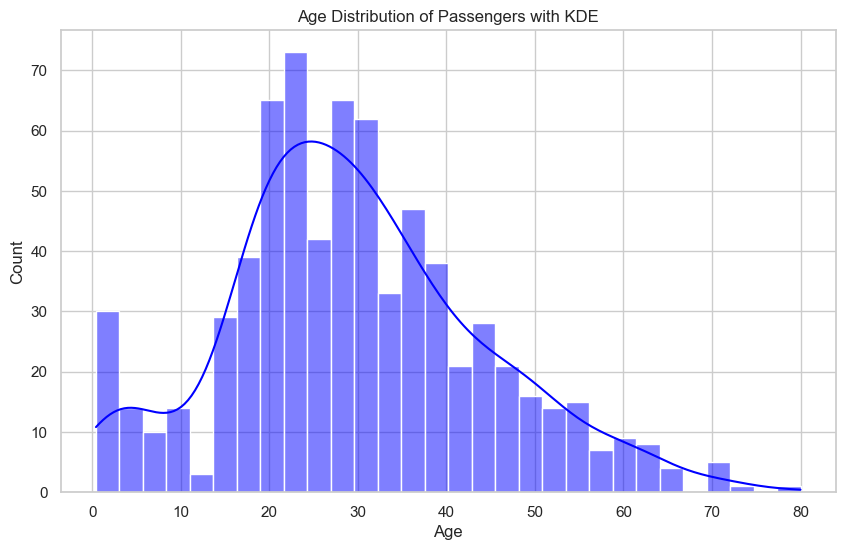

In [17]:
# your code here
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(titanic_df['Age'].dropna(), kde=True, bins=30, color='blue')

plt.title('Age Distribution of Passengers with KDE')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

#The tour was more preferred by people between the ages of 20-30.

## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

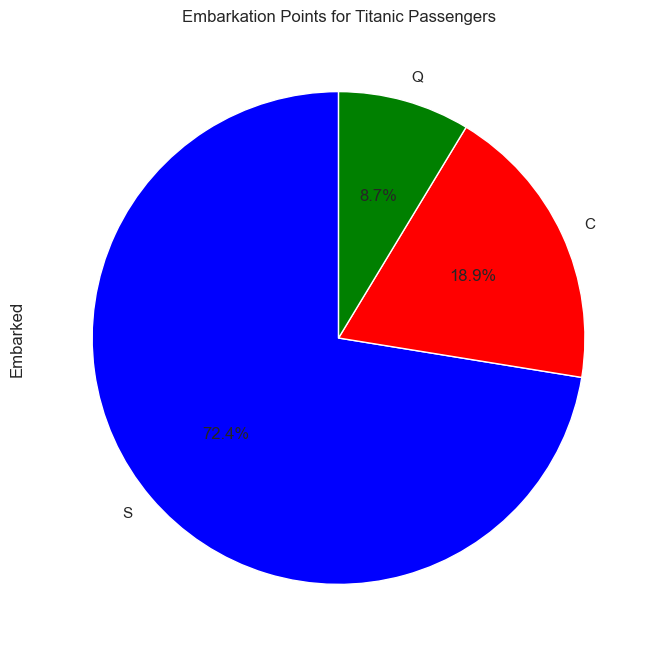

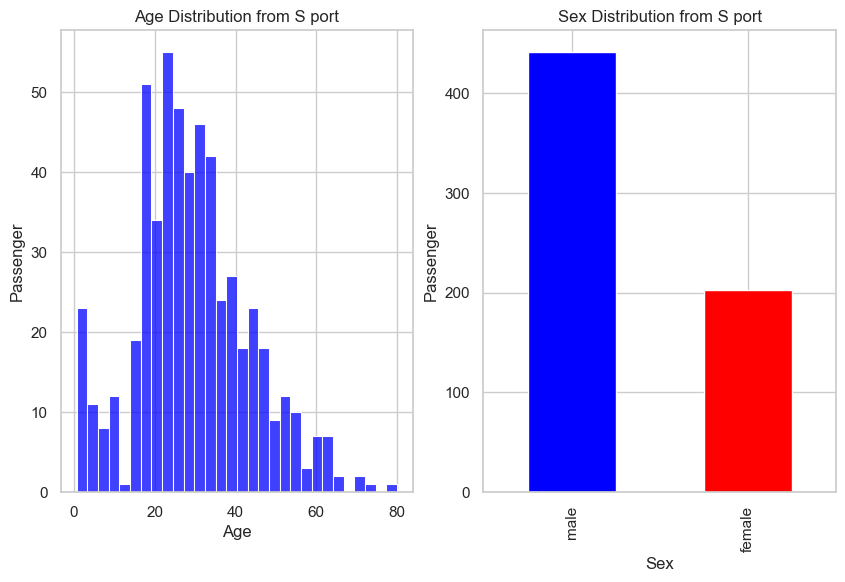

In [32]:
# your code here
sns.set(style="whitegrid")

plt.figure(figsize=(8, 8))
titanic_df['Embarked'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'green'])

plt.title('Embarkation Points for Titanic Passengers')

plt.show()

# Identify the port with the highest boarding
highest_boarding_port = titanic_df['Embarked'].value_counts().idxmax()

highest_boarding_port_data = titanic_df[titanic_df['Embarked'] == highest_boarding_port]
plt.figure(figsize=(10, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(highest_boarding_port_data['Age'].dropna(), bins=30, kde=False, color='blue')
plt.title(f'Age Distribution from {highest_boarding_port} port')
plt.xlabel('Age')
plt.ylabel('Passenger')

# Sex distribution
plt.subplot(1, 2, 2)
highest_boarding_port_data['Sex'].value_counts().plot(kind='bar', color=['blue','red'])
plt.title(f'Sex Distribution from {highest_boarding_port} port')
plt.xlabel('Sex')
plt.ylabel('Passenger')

plt.show()

#According to this graphs, we can't know which passengers are survived. So we can't comment on evacuation policy.

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

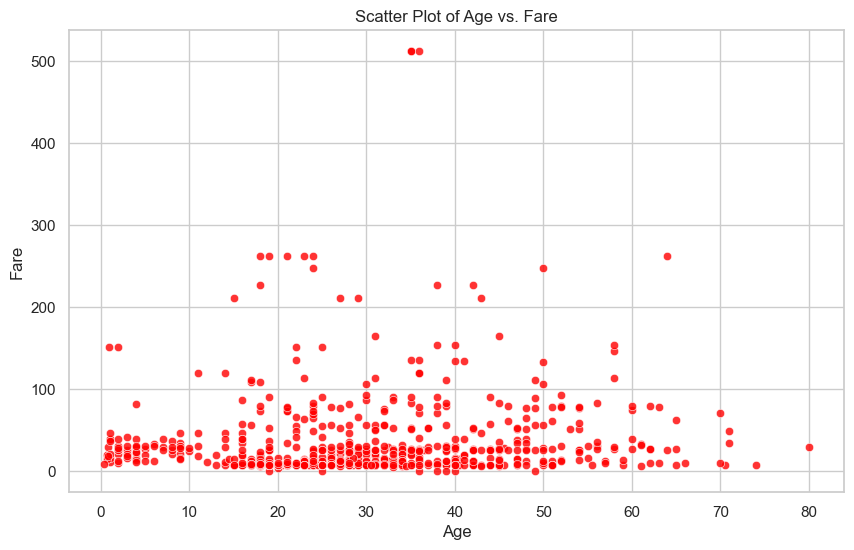

In [33]:
# your code here
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic_df, alpha=0.8, color='red')

plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

#Mostly the tourists have paid same for fare, no correlations exactly

## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


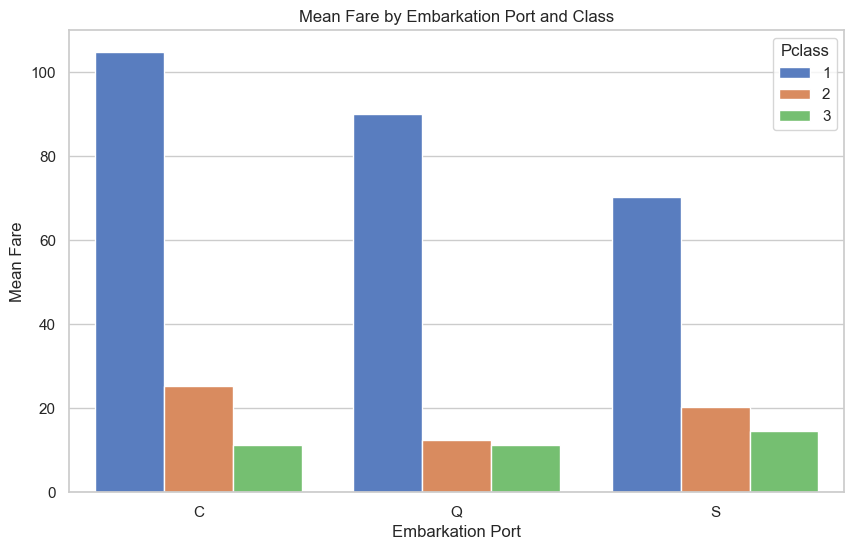

In [34]:
# your code here
sns.set(style="whitegrid")


fare_by_embarked_pclass = titanic_df.groupby(['Embarked', 'Pclass'])['Fare'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Fare', hue='Pclass', data=fare_by_embarked_pclass, palette='muted')

plt.title('Mean Fare by Embarkation Port and Class')
plt.xlabel('Embarkation Port')
plt.ylabel('Mean Fare')

plt.show()

#At each embarkation port, those with a PClass of 3 paid the least, and those with a PClass of 1 paid the most ,

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
